<a href="https://colab.research.google.com/github/kangdh9447/MLP/blob/main/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

아래 학습데이터를 기반으로 ANN 모델을 coding하고 평가하라.

In [6]:
# MLP for numpy
import numpy as np
import matplotlib.pyplot as plt

# Generating a synthetic dataset for regression
np.random.seed(0)
samples = 1000

# Features: Three independent variables
x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)

# Combine the features into a NumPy array
Input = np.column_stack((x1, x2))

# Target: A linear combination of the features plus some noise
y = 2 * x1 + 3 * x2 -1

In [8]:
# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Network parameters
input_layer_size = 2  # Input layer neurons
hidden_layer_size = 3  # Hidden layer neurons
output_layer_size = 1  # Output layer neurons

In [11]:
# Weights and biases
W1 = np.random.rand(hidden_layer_size, input_layer_size)
b1 = np.random.rand(hidden_layer_size)
W2 = np.random.rand(output_layer_size, hidden_layer_size)
b2 = np.random.rand(output_layer_size)

alpha = 0.01 #learning rate
epochs = 50
MSE_list, MAPE_list = [], []
for epoch in range(epochs):
    MSE, MAPE = 0,0
    for iter in range(samples):
        X = Input[iter]
        # Feedforward
        Z_tilde = W1@X.reshape(-1,1)+ b1.reshape(-1,1)
        Z = sigmoid(Z_tilde)
        y_pred = W2@Z.reshape(-1,1) + b2.reshape(-1,1)

        # Calculating the error
        J = 1/2*(y_pred-y[iter])**2
        MSE += J
        MAPE += np.abs((y_pred-y[iter])/y[iter])*100

        # Backpropagation
        # Output layer --> hidden layer
        dJdY = (y_pred-y[iter])
        dJdW2_11, dJdW2_12, djdW2_13 = dJdY*Z[0], dJdY*Z[1], dJdY*Z[2]
        dJdb2 = dJdY
        dJdZ1, dJdZ2, dJdZ3 = dJdY*W2[0,0], dJdY*W2[0,1], dJdY*W2[0,2]

        # Hidden layer --> Input layer
        dJdW1_11 = dJdZ1 * X[0] * sigmoid_derivative(Z_tilde[0])
        dJdW1_12 = dJdZ1 * X[1] * sigmoid_derivative(Z_tilde[0])

        dJdW1_21 = dJdZ2 * X[0] * sigmoid_derivative(Z_tilde[1])
        dJdW1_22 = dJdZ2 * X[1] * sigmoid_derivative(Z_tilde[1])

        dJdW1_31 = dJdZ3 * X[0] * sigmoid_derivative(Z_tilde[2])
        dJdW1_32 = dJdZ3 * X[1] * sigmoid_derivative(Z_tilde[2])

        dJdb1_1 = dJdZ1 * sigmoid_derivative(Z_tilde[0])
        dJdb1_2 = dJdZ2 * sigmoid_derivative(Z_tilde[1])

        # Update
        W1[0][0] += -alpha * dJdW1_11
        W1[0][1] += -alpha * dJdW1_12

        W1[1][0] += -alpha * dJdW1_21
        W1[1][1] += -alpha * dJdW1_22

        W1[2][0] += -alpha * dJdW1_31
        W1[2][1] += -alpha * dJdW1_32

        b1[0] += -alpha * dJdb1_1
        b1[1] += -alpha * dJdb1_2
        W2[0][0] += -alpha * dJdW2_11
        W2[0][1] += -alpha * dJdW2_12
        b2[0] += -alpha*dJdb2

    MSE, MAPE = MSE/samples, MAPE/samples
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(np.squeeze(MAPE))
    if epoch % 5 == 0 or epoch == epochs-1:
       print('MSE and MAPE at epoch ', epoch, ' :',
             np.squeeze(MSE), ' ,', np.squeeze(MAPE))

<ipython-input-11-1a8f7fc2e4f9>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][0] += -alpha * dJdW1_11
<ipython-input-11-1a8f7fc2e4f9>:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][1] += -alpha * dJdW1_12
<ipython-input-11-1a8f7fc2e4f9>:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[1][0] += -alpha * dJdW1_21
<ipython-input-11-1a8f7fc2e4f9>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will erro

MSE and MAPE at epoch  0  : 0.5113065407842143  , 664.9299991478034
MSE and MAPE at epoch  5  : 0.028373419544415385  , 126.34934558025674
MSE and MAPE at epoch  10  : 0.0018436059045426995  , 8.405927265145184
MSE and MAPE at epoch  15  : 0.0016889026346735385  , 8.783726165443396
MSE and MAPE at epoch  20  : 0.0016175137589589388  , 9.473901867653986
MSE and MAPE at epoch  25  : 0.0015603615971518433  , 9.795966487127318
MSE and MAPE at epoch  30  : 0.0015083964820111692  , 9.854978473144483
MSE and MAPE at epoch  35  : 0.0014594092359415018  , 9.789284511099382
MSE and MAPE at epoch  40  : 0.0014127060648253709  , 9.665179072757915
MSE and MAPE at epoch  45  : 0.0013679591530344733  , 9.513543057798937
MSE and MAPE at epoch  49  : 0.0013334177369038454  , 9.382544945689022


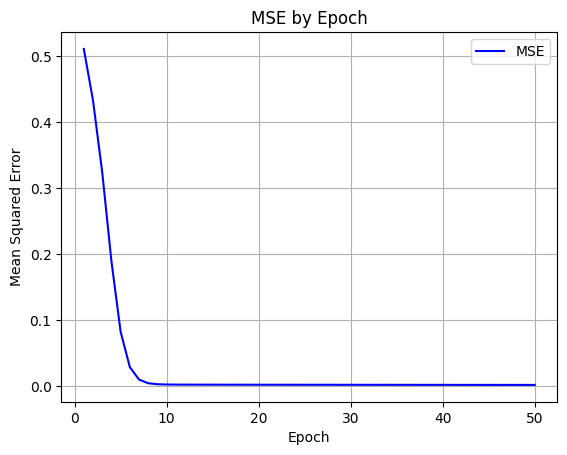

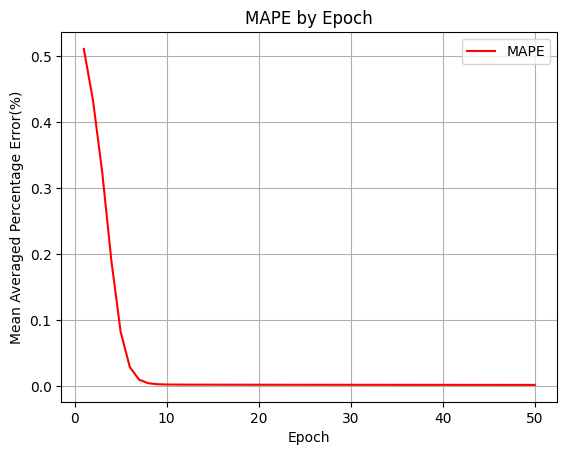

In [12]:
plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MSE', linewidth=1.5, color='b')
#plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MAPE', linewidth=1.5, color='r')
#plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Averaged Percentage Error(%)')
plt.title('MAPE by Epoch')
plt.legend()
plt.grid(True)
plt.show()